In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("zameen-updated.csv")
print(df.shape)
df.head()

(168446, 20)


property_id  location_id  \
0       237062         3325   
1       346905         3236   
2       386513          764   
3       656161          340   
4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   7000000   

      location       city      province_name   latitude  longitude  baths  \
0         G-10  Islamabad  Islamabad Capital  33.679890  73.012640      2   
1         E-11  Islamabad  Islamabad Capital  33.700993  72.971492      3   
2         G-15  Islamabad  Islamabad Capital  33.631486  72.926559      6   
3    Bani Gala  Islamabad  Islamabad Capital  33.707573  73.151199      4   
4  DHA Defence  Islamabad  Islamabad Capital  33.492591  73.301339      3   

        area   purpose  bedrooms date_added         agency  \
0    4 Marla  For Sale         2   2/4/2019            NaN   
1  5.6 Marla  For Sale         3   5/4/2019            NaN   
2    8 Marla  For Sale         5  7/17/2019            NaN   
3    2 Kanal  For Sale         4   4/5/2019            NaN   
4    8 Marla  For Sale         3  7/10/2019  Easy Property   

                                          agent Area Type  Area Size  \
0                                           NaN     Marla        4.0   
1                                           NaN     Marla        5.6   
2                                           NaN     Marla        8.0   
3                                           NaN     Kanal        2.0   
4  Muhammad Junaid Ceo Muhammad Shahid Director     Marla        8.0   

  Area Category  
0     0-5 Marla  
1    5-10 Marla  
2    5-10 Marla  
3     1-5 Kanal  
4    5-10 Marla

In [2]:
df.describe()

property_id    location_id         price       latitude  \
count  1.684460e+05  168446.000000  1.684460e+05  168446.000000   
mean   1.559626e+07    4375.936395  1.776576e+07      29.859519   
std    2.251207e+06    3776.561581  3.531003e+07       3.807870   
min    8.657500e+04       1.000000  0.000000e+00      11.052446   
25%    1.488320e+07    1058.000000  1.750000e+05      24.948536   
50%    1.665851e+07    3286.000000  8.500000e+06      31.459784   
75%    1.708662e+07    7220.000000  1.950000e+07      33.560887   
max    1.735772e+07   14220.000000  2.000000e+09      73.184088   

           longitude          baths       bedrooms      Area Size  
count  168446.000000  168446.000000  168446.000000  168446.000000  
mean       71.239804       2.874227       3.179422       5.892188  
std         3.133042       2.463400       1.971401       5.778327  
min        25.906027       0.000000       0.000000       0.000000  
25%        67.130363       0.000000       2.000000       3.000000  
50%        73.056182       3.000000       3.000000       5.000000  
75%        73.259870       4.000000       4.000000       8.000000  
max        80.161430     403.000000      68.000000     800.000000

# Counting Null Values

In [3]:
# Null values in each column
null_values = df.isna().sum()
null_values

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [4]:
# Missing values in each column
missing_values = df.isnull().sum()
missing_values

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [5]:
#drop url column as not much need 
df = df.drop(["page_url","property_id"], axis = 1)

# Creating New Columns

In [6]:
#filling vacant space to 0
df.fillna(0)

# To Standardize area. Converting kanal to marla
kanal_to_marla = 20

def conversion(row):
    if row['Area Type'] == "Kanal":
        return row['Area Size'] * kanal_to_marla 
    elif row['Area Type'] == "Marla":
        return row['Area Size']

df['Area(Marla)'] = df.apply(conversion, axis=1)

#We are also extracting Date, Month, Year from Date to new columns (might needed in future)

df['date_added'] = pd.to_datetime(df["date_added"], format="%m/%d/%Y")

df.insert(14, "Day", df["date_added"].dt.day)
df.insert(15, "Month", df["date_added"].dt.month)
df.insert(16, "Year", df["date_added"].dt.year) #dt is accessor

df.head()

location_id property_type     price     location       city  \
0         3325          Flat  10000000         G-10  Islamabad   
1         3236          Flat   6900000         E-11  Islamabad   
2          764         House  16500000         G-15  Islamabad   
3          340         House  43500000    Bani Gala  Islamabad   
4         3226         House   7000000  DHA Defence  Islamabad   

       province_name   latitude  longitude  baths       area  ... date_added  \
0  Islamabad Capital  33.679890  73.012640      2    4 Marla  ... 2019-02-04   
1  Islamabad Capital  33.700993  72.971492      3  5.6 Marla  ... 2019-05-04   
2  Islamabad Capital  33.631486  72.926559      6    8 Marla  ... 2019-07-17   
3  Islamabad Capital  33.707573  73.151199      4    2 Kanal  ... 2019-04-05   
4  Islamabad Capital  33.492591  73.301339      3    8 Marla  ... 2019-07-10   

          agency Day Month  Year  \
0            NaN   4     2  2019   
1            NaN   4     5  2019   
2            NaN  17     7  2019   
3            NaN   5     4  2019   
4  Easy Property  10     7  2019   

                                          agent  Area Type Area Size  \
0                                           NaN      Marla       4.0   
1                                           NaN      Marla       5.6   
2                                           NaN      Marla       8.0   
3                                           NaN      Kanal       2.0   
4  Muhammad Junaid Ceo Muhammad Shahid Director      Marla       8.0   

  Area Category  Area(Marla)  
0     0-5 Marla          4.0  
1    5-10 Marla          5.6  
2    5-10 Marla          8.0  
3     1-5 Kanal         40.0  
4    5-10 Marla          8.0  

[5 rows x 22 columns]

# Cleaning Data

In [7]:
#Dropping Agency and agent column
df2 = df.drop(["agent","agency"], axis=1)

### By BedRoom and Baths

In [8]:
#We will also remove those having rooms > 3 and baths == 0, quite unusual
df2 = df2.drop(df2[(df2['baths']==0) & (df2['bedrooms'] > 3)].index)

In [9]:
df2[(df2['baths']==0) | (df2['bedrooms']==0)].head(40)

location_id  property_type       price                  location  \
12          3300          House   400000000                       F-6   
19           424           Flat     1750000        PWD Housing Scheme   
47             8          House   220000000                Model Town   
49            75          House     9500000                      Eden   
60          1781          House    18500000               Bahria Town   
83           373          House    65000000  Valencia Housing Society   
84          3852          House  1250000000                   Gulberg   
86          4280          House    66500000  Valencia Housing Society   
91          3748          House    47500000               EME Society   
105         1312          House    12800000           Chaklala Scheme   
168         6655           Flat    29500000                     Cantt   
169         6655           Flat    30000000                     Cantt   
171          198           Flat    45000000               Bath Island   
174          235           Flat     5000000      Gulshan-e-Iqbal Town   
201         6870          House    72500000      Gulshan-e-Iqbal Town   
217         6858           Room        8000      Gulshan-e-Iqbal Town   
222          737           Flat     2500000                      D-17   
235          162  Lower Portion       85000                      F-10   
295         3847          House    65000000                   Gulberg   
311         3811          House    60000000                   Gulberg   
312         3852          House  1200000000                   Gulberg   
313         3850          House   380000000                   Gulberg   
322         1270           Flat    16000000                  Askari 7   
324         9438           Flat    11500000                  Askari 1   
349         6934           Flat    25000000              Jamshed Town   
353         8298           Flat     6000000       Bahria Town Karachi   
354         8298           Flat     6200000       Bahria Town Karachi   
380         3241           Flat     5000000                      E-11   
383         1333          House     4200000               DHA Defence   
413         9439           Flat       35000                  Askari 2   
418         1504           Flat       35000                 Askari 14   
424            7          House   480000000                   Gulberg   
425         1534           Flat    22500000               Garden Town   
431         4164          House    60000000           Sabzazar Scheme   
432         1534          House   175000000               Garden Town   
458           93          House    90000000                Johar Town   
466         1552          House    75000000                Model Town   
467          410          House    37500000               EME Society   
472          423          House    11000000                Wapda Town   
475         1551          House   190000000                Model Town   

           city      province_name   latitude  longitude  baths        area  \
12    Islamabad  Islamabad Capital  33.731532  73.065696      0   4.5 Kanal   
19    Islamabad  Islamabad Capital  33.570792  73.145256      0   1.5 Marla   
47       Lahore             Punjab  31.483869  74.325686      0     6 Kanal   
49       Lahore             Punjab  31.499348  74.416959      0     9 Marla   
60       Lahore             Punjab  31.381706  74.195294      0    10 Marla   
83       Lahore             Punjab  31.405370  74.257078      0     2 Kanal   
84       Lahore             Punjab  31.519435  74.345548      0     8 Kanal   
86       Lahore             Punjab  31.400096  74.259682      0     2 Kanal   
91       Lahore             Punjab  31.434668  74.214005      0     1 Kanal   
105  Rawalpindi             Punjab  33.656924  73.143826      0     7 Marla   
168     Karachi              Sindh  24.937425  67.182856      0  11.4 Marla   
169     Karachi              Sindh  24.937425  67.182856      0

In [10]:
#droping entries having no bed and baths
df2 = df2.drop(df2[(df2['baths']==0) | (df2['bedrooms']==0)].index)

In [11]:
df2[df2['bedrooms']>15]

location_id property_type      price           location       city  \
28977           165         House     550000                F-7  Islamabad   
131218         6828         House  150000000  Gulistan-e-Jauhar    Karachi   

            province_name   latitude  longitude  baths       area   purpose  \
28977   Islamabad Capital  33.720413  73.056493     10  2.4 Kanal  For Rent   
131218              Sindh  24.929252  67.136679      6  1.2 Kanal  For Sale   

        bedrooms date_added  Day  Month  Year Area Type  Area Size  \
28977         18 2019-06-13   13      6  2019     Kanal        2.4   
131218        16 2019-07-04    4      7  2019     Kanal        1.2   

       Area Category  Area(Marla)  
28977      1-5 Kanal         48.0  
131218     1-5 Kanal         24.0

In [12]:
df2 = df2.drop(df2[df2['bedrooms'] > 15].index)
print(df2.shape)
df2['baths'].unique()

(125621, 20)


array([  2,   3,   6,   4,   8,   7,   5,   1,  10,   9,  11,  13,  12,
       403,  14], dtype=int64)

In [13]:
df2 = df2.drop(df2[df2['baths'] > 15].index)

In [14]:
#Also dropping for those having baths > (rooms+3)
df2[(df2['baths']) > (df2['bedrooms']+3)]

location_id property_type     price       location        city  \
419            9438          Flat     32000       Askari 1  Rawalpindi   
596           10663          Flat  15000000    DHA Defence   Islamabad   
2752           3808         House  51000000        Gulberg      Lahore   
3000           4984         House  20000000  Lasani Garden  Faisalabad   
3775           9586         House  95000000          Cantt     Karachi   
...             ...           ...       ...            ...         ...   
157468         1482         House    500000    DHA Defence     Karachi   
159721         3346         House    250000           G-14   Islamabad   
161541        12971         House  27500000      Scheme 33     Karachi   
162777          570          Flat    540000     Gadap Town     Karachi   
165151         1446         House  32500000    DHA Defence      Lahore   

            province_name   latitude  longitude  baths       area   purpose  \
419                Punjab  33.581306  73.087962      7   10 Marla  For Rent   
596     Islamabad Capital  33.539071  73.156333      8   12 Marla  For Sale   
2752               Punjab  31.528068  74.347544     10    1 Kanal  For Sale   
3000               Punjab  31.457771  73.071649      8    6 Marla  For Sale   
3775                Sindh  24.959894  67.188631     10  1.1 Kanal  For Sale   
...                   ...        ...        ...    ...        ...       ...   
157468              Sindh  24.810265  67.043552     10    2 Kanal  For Rent   
159721  Islamabad Capital  33.638228  72.953341     14  1.5 Kanal  For Sale   
161541              Sindh  24.969948  67.176168      9  9.6 Marla  For Sale   
162777              Sindh  25.050147  67.026100      6  2.8 Marla  For Sale   
165151             Punjab  31.465422  74.385309     10   10 Marla  For Sale   

        bedrooms date_added  Day  Month  Year Area Type  Area Size  \
419            3 2019-05-06    6      5  2019     Marla       10.0   
596            4 2019-06-13   13      6  2019     Marla       12.0   
2752           5 2018-09-06    6      9  2018     Kanal        1.0   
3000           4 2019-07-17   17      7  2019     Marla        6.0   
3775           6 2019-06-05    5      6  2019     Kanal        1.1   
...          ...        ...  ...    ...   ...       ...        ...   
157468         6 2019-07-15   15      7  2019     Kanal        2.0   
159721        10 2019-07-16   16      7  2019     Kanal        1.5   
161541         5 2019-07-17   17      7  2019     Marla        9.6   
162777         2 2019-07-17   17      7  2019     Marla        2.8   
165151         4 2019-07-17   17      7  2019     Marla       10.0   

       Area Category  Area(Marla)  
419       5-10 Marla         10.0  
596      10-15 Marla         12.0  
2752       1-5 Kanal         20.0  
3000      5-10 Marla          6.0  
3775       1-5 Kanal         22.0  
...              ...          ...  
157468     1-5 Kanal         40.0  
159721     1-5 Kanal         30.0  
161541    5-10 Marla          9.6  
162777     0-5 Marla          2.8  
165151    5-10 Marla         10.0  

[126 rows x 20 columns]

In [15]:
df2 = df2.drop(df2[df2['baths']>(df2['bedrooms']+3)].index)
df2.shape

(125494, 20)

### Outliers 

In [16]:
#No. of Non-duplicates (location key)
values_after_deduplication = df['location_id'].nunique() 
print(values_after_deduplication)

4198


Droping entries having price < 3000 For Rent and price <100000 For Sale

In [17]:
df2 = df2.drop(df2[df2['price']<3000].index)

In [18]:
pd.set_option('display.max_columns', None)
df2 = df2.drop(df2[(df2['price']<100000) & (df2['purpose']=='For Sale')].index) 

In [19]:
#Removing those having Area(marla) == 0
df2 = df2.drop(df2[df2['Area(Marla)']==0].index)

We will create another column 'price per marla', so that we can compare it with HomeTown avg. price, to remove outliers

In [20]:
df2['Price per Marla'] = df2['price'] / df2['Area(Marla)']

In [21]:
#Droping price (marla) > 6,000,000
df2 = df2.drop(df2[df2['Price per Marla']>6000000].index)

In [22]:
len(df['location'].unique())

1509

In [23]:
#Removing any leading or trailing whitespaces from each location entry
df['location'] = df['location'].apply(lambda x: x.strip()) 

#Count Occurence of each location value
location_stats = df2['location'].value_counts(ascending=False)

location_stats.head(20)

location
DHA Defence               17228
Bahria Town Karachi        7865
Bahria Town Rawalpindi     6008
Bahria Town                5486
Gulistan-e-Jauhar          4320
Gulshan-e-Iqbal Town       3570
E-11                       2371
Gadap Town                 2222
North Karachi              2100
North Nazimabad            2095
Scheme 33                  2058
Cantt                      1937
G-13                       1849
F-11                       1567
Johar Town                 1522
G-11                       1495
Clifton                    1415
I-8                        1369
Malir                      1133
Federal B Area             1113
Name: count, dtype: int64

But it is not mention which Bahria Town, Cantt or DHA Defence it is.
We will now concat city with each of them

In [24]:
locations = ["Bahria Town", "Askari", "DHA Defence","Gulberg"]
df2['location'] = np.where((df2['location'].isin(locations)), 
                              df2['location'] + ' ' + df2['city'],
                              df2['location'])

In [25]:
#Count Occurence of each location value Once Again
location_stats = df2['location'].value_counts(ascending=False)

location_stats.head()

location
Bahria Town Karachi       7865
DHA Defence Karachi       7632
DHA Defence Lahore        6747
Bahria Town Rawalpindi    6008
Gulistan-e-Jauhar         4320
Name: count, dtype: int64

Crating 2 Seperate dataFrame For Sale and For Rent

In [26]:
df_sale = df2[df2["purpose"]== "For Sale"]
df_rent = df2[df2["purpose"]== "For Rent"]
df_rent.head()

location_id  property_type   price               location       city  \
35         3190          House  110000  DHA Defence Islamabad  Islamabad   
36          165          House  600000                    F-7  Islamabad   
37         3349  Lower Portion   33000                   G-15  Islamabad   
38         1378          House   45000          Pakistan Town  Islamabad   
39          156  Upper Portion   12000             Bhara kahu  Islamabad   

        province_name   latitude  longitude  baths       area   purpose  \
35  Islamabad Capital  33.542039  73.093414      5    1 Kanal  For Rent   
36  Islamabad Capital  33.720413  73.056493      6    2 Kanal  For Rent   
37  Islamabad Capital  33.633416  72.918220      2    8 Marla  For Rent   
38  Islamabad Capital  33.575405  73.143325      5  1.2 Kanal  For Rent   
39  Islamabad Capital  33.737402  73.179159      2    5 Marla  For Rent   

    bedrooms date_added  Day  Month  Year Area Type  Area Size Area Category  \
35         5 2018-10-20   20     10  2018     Kanal        1.0     1-5 Kanal   
36         6 2018-10-20   20     10  2018     Kanal        2.0     1-5 Kanal   
37         2 2018-10-20   20     10  2018     Marla        8.0    5-10 Marla   
38         3 2019-07-11   11      7  2019     Kanal        1.2     1-5 Kanal   
39         2 2019-02-04    4      2  2019     Marla        5.0     0-5 Marla   

    Area(Marla)  Price per Marla  
35         20.0           5500.0  
36         40.0          15000.0  
37          8.0           4125.0  
38         24.0           1875.0  
39          5.0           2400.0

In [27]:
def identify_outliers(group):
    #Droping value, Lower Bound = 10th Percentile & Upper Bound = 90th Perc
    Q1 = group['Price per Marla'].quantile(0.10)
    Q3 = group['Price per Marla'].quantile(0.90)
    IQR = Q3 - Q1
    return group[(group['Price per Marla'] >= Q1 - 1.5 * IQR) & 
                 (group['Price per Marla'] <= Q3 + 1.5 * IQR)]


# Apply the filter_outliers function to each group of locations
df_sale = df_sale.groupby('location').apply(identify_outliers)
df_rent = df_rent.groupby('location').apply(identify_outliers)

# Reset the index of the resulting DataFrame
df_sale.reset_index(drop=True, inplace=True)
df_rent.reset_index(drop=True, inplace=True)

print(df_rent.shape)
print(df_sale.shape)

(32552, 21)
(90585, 21)


### Droping Duplicates
There are unusual duplicate values in this Dataset.
We will drop these with location_key,

In [28]:
#No. of Non-duplicates (location key)
values_after_deduplication = df_rent['location_id'].nunique() 
print("df_Rent:", values_after_deduplication)

values_after_deduplication = df_sale['location_id'].nunique() 
print("df_sale:", values_after_deduplication)

df_Rent: 1433
df_sale: 3821


We will retain only 1 value for each location, although there might be more than 1 entries for same location (As there are many portions in Flats)

In [29]:
#TO KEEP ONLY LATEST ENTRY FOR A LOCATION
#Sort it by date and pick up the latest one

df_sale['date_added'] = pd.to_datetime(df_sale['date_added']) 
df_sale = df_sale.sort_values(by=['location_id', 'date_added'], ascending=[True, False])
df_sale = df_sale.drop_duplicates(subset='location_id', keep='first')
df_sale.shape

(3821, 21)

In [30]:
df_rent['date_added'] = pd.to_datetime(df_rent['date_added']) 
df_rent = df_rent.sort_values(by=['location_id', 'date_added'], ascending=[True, False])
df_rent = df_rent.drop_duplicates(subset='location_id', keep='first')
df_rent.shape

(1433, 21)

In [31]:
#Count Occurence of each location value in Sale df
location_stats_sale = df_sale['location'].value_counts(ascending=False)

location_stats_sale.head()

location
DHA Defence Lahore        125
Scheme 33                  97
Bahria Town Rawalpindi     88
Gadap Town                 72
Gulshan-e-Iqbal Town       70
Name: count, dtype: int64

In [32]:
#Count Occurence of each location value in rent df
location_stats_rent = df_rent['location'].value_counts(ascending=False)

location_stats_rent.head()

location
Bahria Town Rawalpindi    80
Gulshan-e-Iqbal Town      58
DHA Defence Karachi       45
DHA Defence Islamabad     42
Scheme 33                 36
Name: count, dtype: int64

# Data Visualize

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
import plotly.express as px
%matplotlib inline

## Street Map

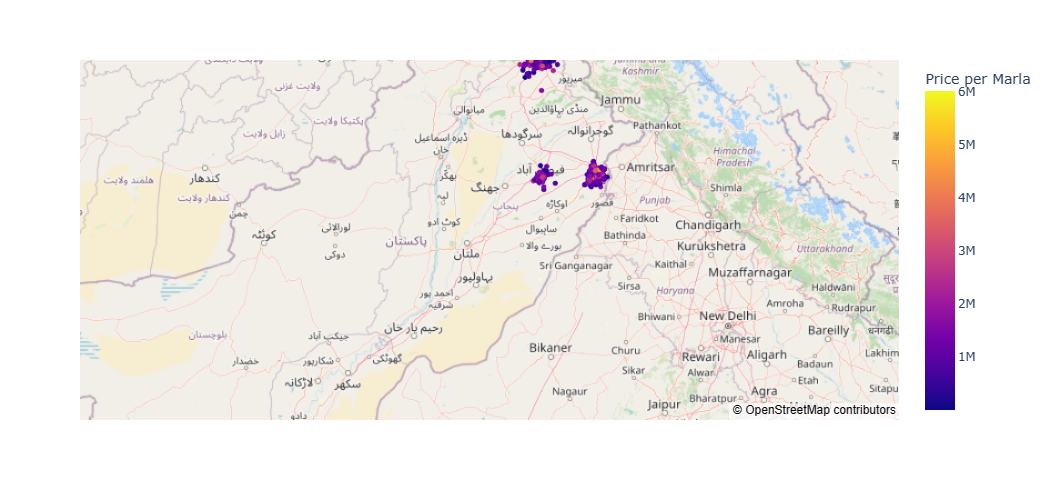

In [34]:
min_value = df_sale['Price per Marla'].min()
max_value = df_sale['Price per Marla'].max()

fig = px.scatter_mapbox(
    df_sale,
    lat="latitude",
    lon="longitude",
    hover_name="location_id",
    hover_data = ["property_type","price","location"],
    color="Price per Marla",
    width=1000, height=500,
    range_color=(min_value, max_value),
    zoom=5
)

fig.update_layout(mapbox_style="open-street-map")
pio.show(fig) #renderer="notebook"

## Rooms vs Price Per Marla Plot (of Specific Location)

In [35]:
def scatter_chart(df, location):
    One_Four_Beds = df[(df['location'] == location) & (df['bedrooms'] >= 1) & (df['bedrooms'] <= 4)]
    Four_plus_Beds = df[(df['location'] == location) & (df['bedrooms'] > 4)]

    plt.scatter(One_Four_Beds['Area(Marla)'], One_Four_Beds['price']/100000, color='blue', label="1 to 4 Bedrooms", s=50)
    plt.scatter(Four_plus_Beds ['Area(Marla)'], Four_plus_Beds['price']/100000, marker='+', color="green", label="4+ Bedrooms", s=50)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.xlabel("Size per Marla")
    plt.ylabel("Price (Lac)")
    plt.title(location)
    plt.legend()

### For Sale House

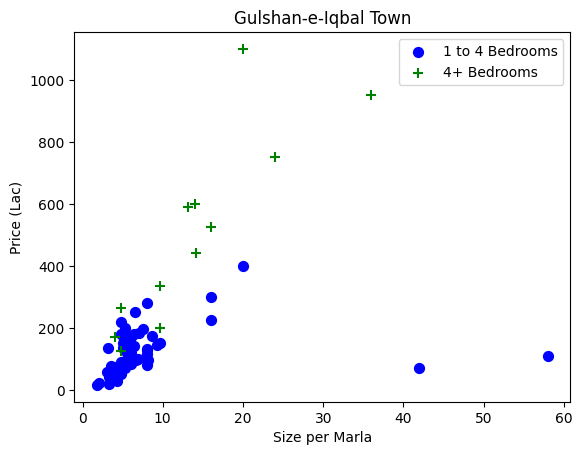

In [36]:
scatter_chart(df_sale, "Gulshan-e-Iqbal Town")

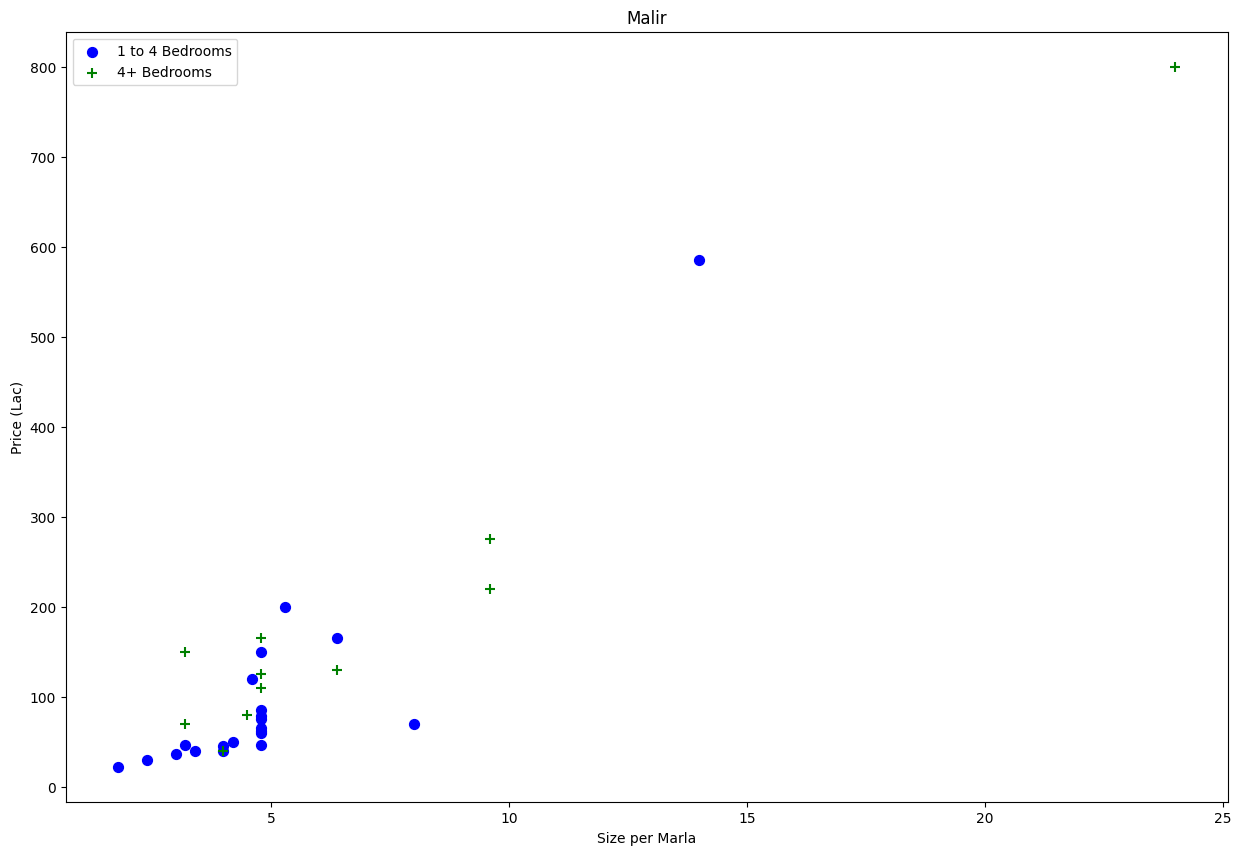

In [37]:
scatter_chart(df_sale, "Malir")

### For Rent

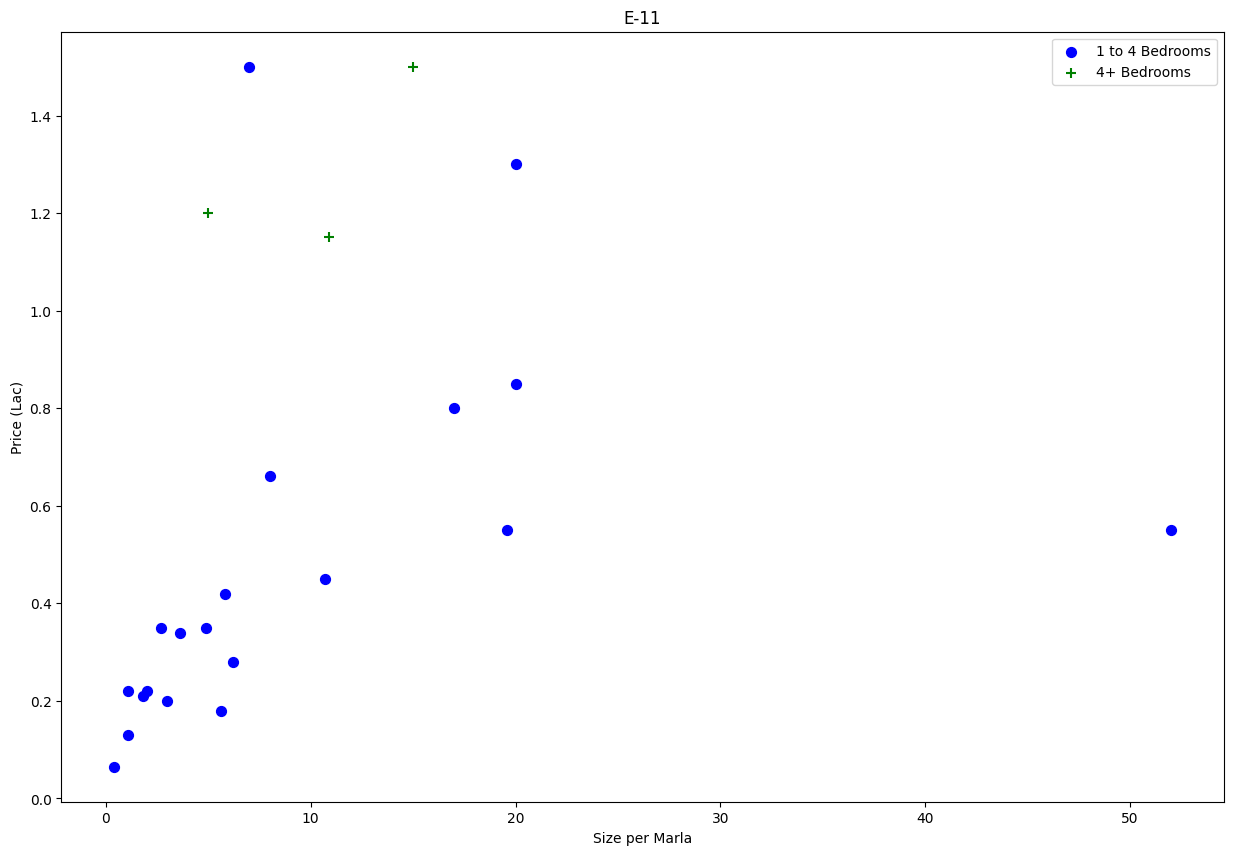

In [38]:
scatter_chart(df_rent, "E-11")

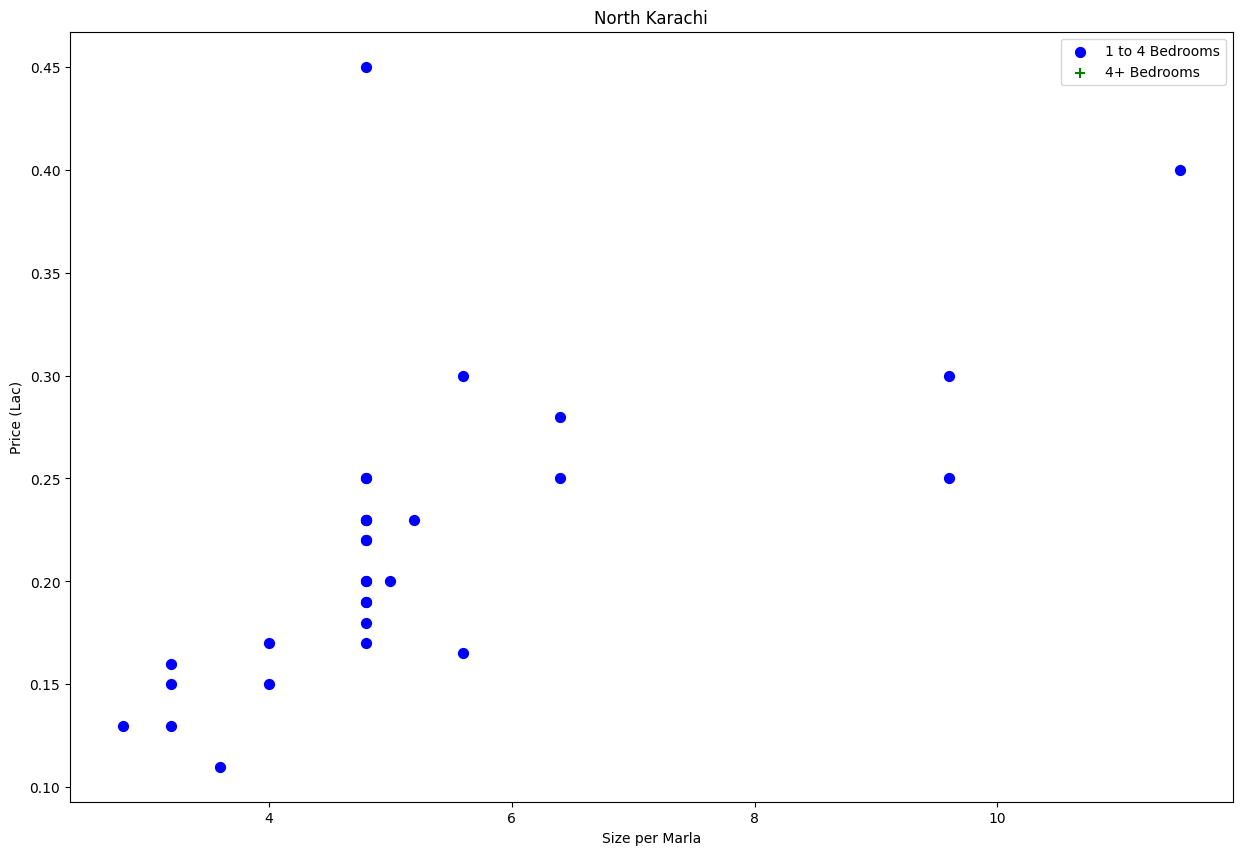

In [39]:
scatter_chart(df_rent, "North Karachi")

## Plotting Most Expensive Locations in each City

In [40]:
def expensive_locations(dataset, city_name):
    # Dataset for the specified city
    df_city = dataset[dataset['city'] == city_name]

    counts = df_city['location'].value_counts()

    # Only locations with more than 5 entries
    valid_locations = counts[counts > 5].index
    df_city = df_city[df_city['location'].isin(valid_locations)]

    # Calculate avg price per Marla
    df_expensive = df_city.groupby('location')['price'].mean().reset_index()

    # Sorting locations by avg price in descending order
    df_expensive = df_expensive.sort_values(by='price', ascending=False)

    # Selecting only the top most expensive locations
    df_top_locations = df_expensive.head(15)

    plt.bar(df_top_locations['location'], df_top_locations['price'] / 100000, color='skyblue')
    plt.xlabel('Location')
    plt.ylabel('Average Price per Marla (Lac)')
    plt.title(f' in {city_name}', fontsize=15)
    plt.xticks(rotation=45, ha='right')

### For Sale

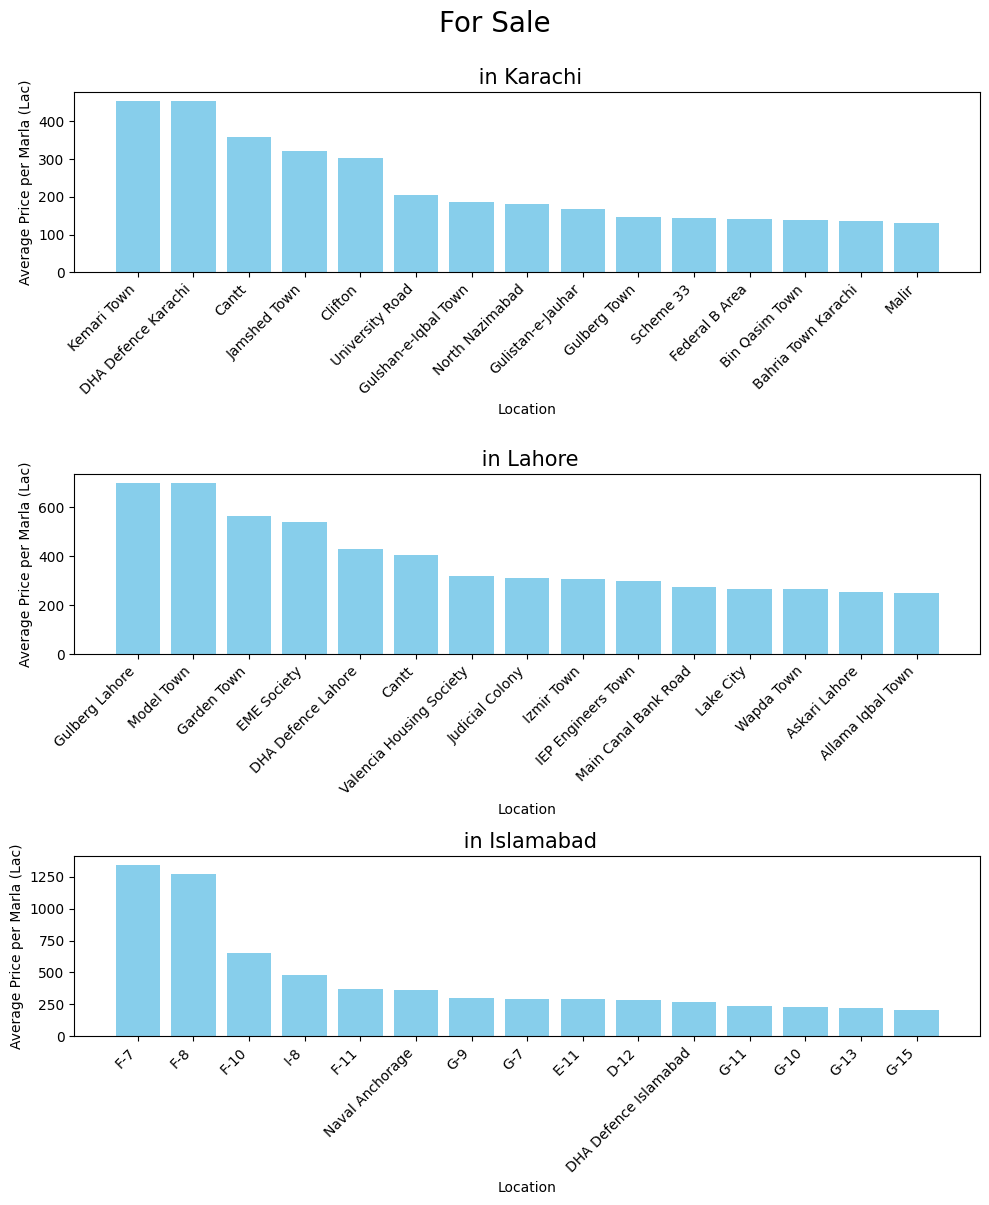

In [41]:
plt.figure(figsize=(10, 12))
plt.suptitle("For Sale", fontsize = 20, y=1)

plt.subplot(3, 1, 1)
expensive_locations(df_sale, 'Karachi')

plt.subplot(3, 1, 2)
expensive_locations(df_sale, 'Lahore')

plt.subplot(3, 1, 3)
expensive_locations(df_sale, 'Islamabad')

plt.tight_layout()
plt.show()

### For Rent

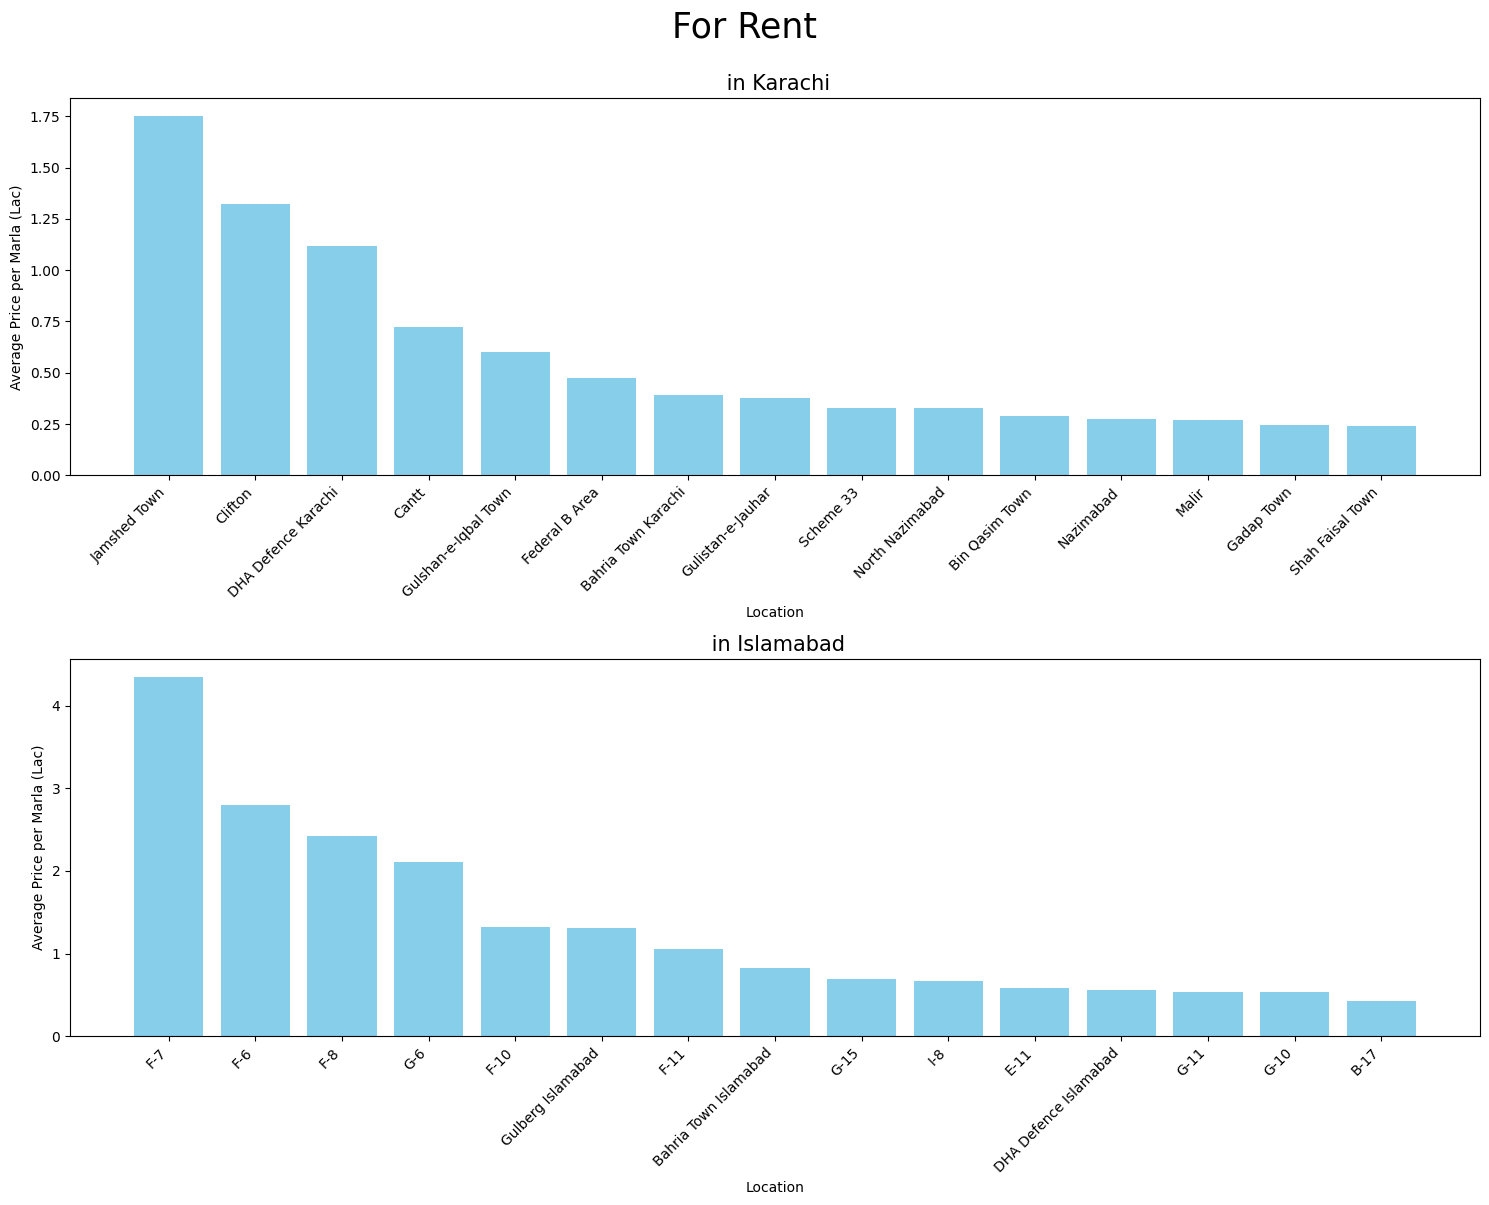

In [42]:
plt.figure(figsize=(15, 12))
plt.suptitle("For Rent", fontsize = 25, y=1, horizontalalignment='center')
plt.subplot(2, 1, 1)
expensive_locations(df_rent, 'Karachi')

plt.subplot(2, 1, 2)
expensive_locations(df_rent, 'Islamabad')

plt.tight_layout()
plt.show()

In [43]:
df_sale

location_id property_type     price                      location  \
67415            1         House  11000000                Lahore, Punjab   
65422            2         House  12000000                Karachi, Sindh   
62040            3          Flat   4300000  Islamabad, Islamabad Capital   
50884            4         House  33000000                   Garden Town   
26934            5          Flat   9000000                       Clifton   
...            ...           ...       ...                           ...   
7351         14104          Flat   4500000         Bahria Town Islamabad   
52548        14130          Flat   1715000             Gulberg Islamabad   
29738        14141         House  15600000         DHA Defence Islamabad   
65480        14143          Flat  13800000               Kashmir Highway   
84932        14220          Flat   4000000                     Scheme 33   

            city      province_name   latitude  longitude  baths       area  \
67415     Lahore             Punjab  31.545771  74.341328      3    5 Marla   
65422    Karachi              Sindh  24.862336  67.013893      4  4.8 Marla   
62040  Islamabad  Islamabad Capital  33.749464  73.061142      1  1.7 Marla   
50884     Lahore             Punjab  31.503922  74.323139      6   10 Marla   
26934    Karachi              Sindh  24.825028  67.031579      2  4.8 Marla   
...          ...                ...        ...        ...    ...        ...   
7351   Islamabad  Islamabad Capital  33.688312  73.211490      1  2.7 Marla   
52548  Islamabad  Islamabad Capital  33.612100  73.191100      1  2.7 Marla   
29738  Islamabad  Islamabad Capital  33.501383  73.141996      2    5 Marla   
65480  Islamabad  Islamabad Capital  33.601515  72.889499      1  3.4 Marla   
84932    Karachi              Sindh  24.989395  67.129645      2  3.6 Marla   

        purpose  bedrooms date_added  Day  Month  Year Area Type  Area Size  \
67415  For Sale         3 2019-06-20   20      6  2019     Marla        5.0   
65422  For Sale         4 2019-04-06    6      4  2019     Marla        4.8   
62040  For Sale         1 2019-04-05    5      4  2019     Marla        1.7   
50884  For Sale         5 2019-07-18   18      7  2019     Marla       10.0   
26934  For Sale         2 2019-07-18   18      7  2019     Marla        4.8   
...         ...       ...        ...  ...    ...   ...       ...        ...   
7351   For Sale         1 2019-07-01    1      7  2019     Marla        2.7   
52548  For Sale         1 2019-07-12   12      7  2019     Marla        2.7   
29738  For Sale         2 2019-07-09    9      7  2019     Marla        5.0   
65480  For Sale         1 2019-07-15   15      7  2019     Marla        3.4   
84932  For Sale         2 2019-07-17   17      7  2019     Marla        3.6   

      Area Category  Area(Marla)  Price per Marla  
67415     0-5 Marla          5.0     2.200000e+06  
65422     0-5 Marla          4.8     2.500000e+06  
62040     0-5 Marla          1.7     2.529412e+06  
50884    5-10 Marla         10.0     3.300000e+06  
26934     0-5 Marla          4.8     1.875000e+06  
...             ...          ...              ...  
7351      0-5 Marla          2.7     1.666667e+06  
52548     0-5 Marla          2.7     6.351852e+05  
29738     0-5 Marla          5.0     3.120000e+06  
65480     0-5 Marla          3.4     4.058824e+06  
84932     0-5 Marla          3.6     1.111111e+06  

[3821 rows x 21 columns]

## Plotting Different Property Types

In [44]:
df_sale['property_type'].unique()

array(['House', 'Flat', 'Farm House', 'Lower Portion', 'Upper Portion',
       'Penthouse', 'Room'], dtype=object)

In [45]:
#df2[df2['property_type']=='Farm House']

### For Sale

In [46]:
df_sale_propTypes = df_sale['property_type'].value_counts()
pd.DataFrame(df_sale_propTypes)

count
property_type       
House           3019
Flat             682
Upper Portion     52
Farm House        30
Lower Portion     21
Penthouse         16
Room               1

### For Rent

In [47]:
df_rent_propTypes = df_rent['property_type'].value_counts()
pd.DataFrame(df_rent_propTypes)

count
property_type       
House            483
Flat             360
Upper Portion    332
Lower Portion    213
Room              33
Farm House         9
Penthouse          3

### No. of Property Over Time

In [48]:
def property_type_trends(df, title):
    
    df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

    #To understand: It creates groups of rows where the combination of 'property type' and 'date' is same
    #Size() returns no. of occurance, actually it counts the rows
    # The resulting DataFrame has columns 'property_type', 'date', and 'count'
    property_counts_time = df.groupby(['property_type', 'date']).size().reset_index(name='count')
   
    sns.lineplot(x='date', y='count', hue='property_type', data=property_counts_time, marker='o') #hue = key Variable
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Listings')
    plt.legend(title='Property Type')

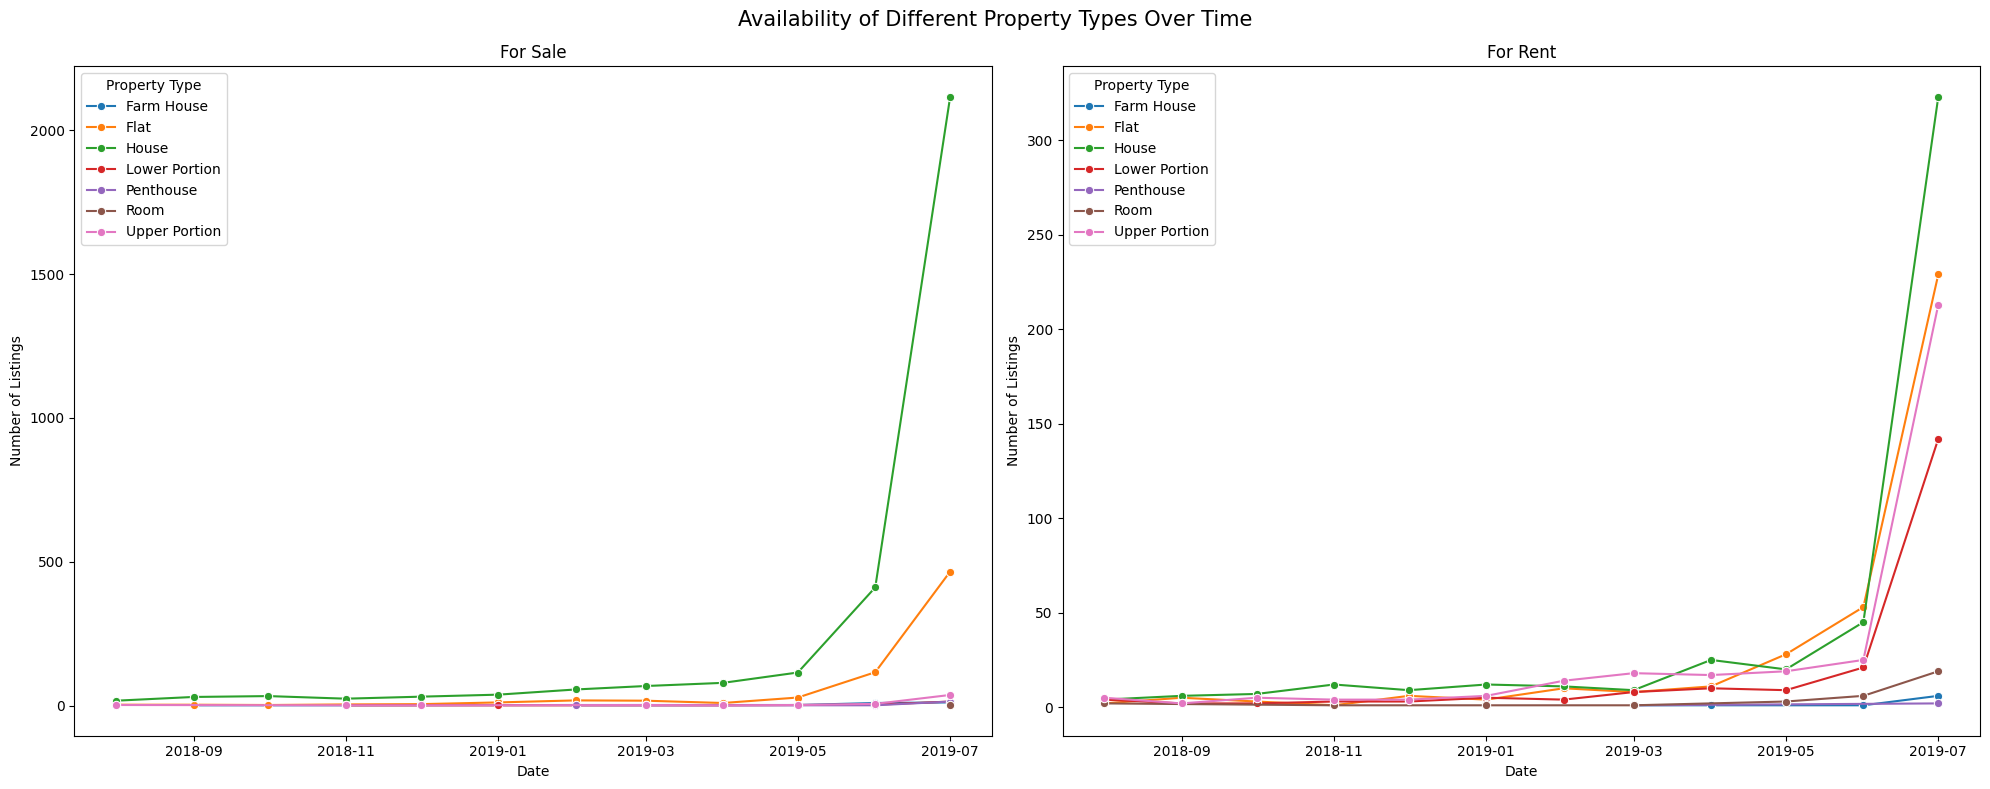

In [49]:
plt.figure(figsize=(20, 8))
plt.suptitle("Availability of Different Property Types Over Time", fontsize = 15)


plt.subplot(1, 2, 1)
df_sale_copy = df_sale.copy(deep=True)
property_type_trends(df_sale_copy, "For Sale")

plt.subplot(1, 2, 2)
df_rent_copy = df_rent.copy(deep=True)
property_type_trends(df_rent_copy, "For Rent")

plt.tight_layout()
plt.show()

### avg. price of Property over Time

In [50]:
def property_avg_price(df, title):
    df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

    # Calculating count
    counts = df.groupby(['property_type', 'date']).size().reset_index(name='count')

    # Filtering property types with count > 5
    valid_property_types = counts[counts['count'] > 10]['property_type']
    
    df_filtered = df[df['property_type'].isin(valid_property_types)]

    # Grouping by 'property_type' and 'date', and calculating avg price per Marla within each group
    property_prices_time = df_filtered.groupby(['property_type', 'date'])['Price per Marla'].agg(['mean', 'std']).reset_index()

    sns.barplot(x='date', y='mean', hue='property_type', data=property_prices_time)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Average Price per Marla')
    plt.legend(title='Property Type', loc='upper left', bbox_to_anchor=(1, 1))

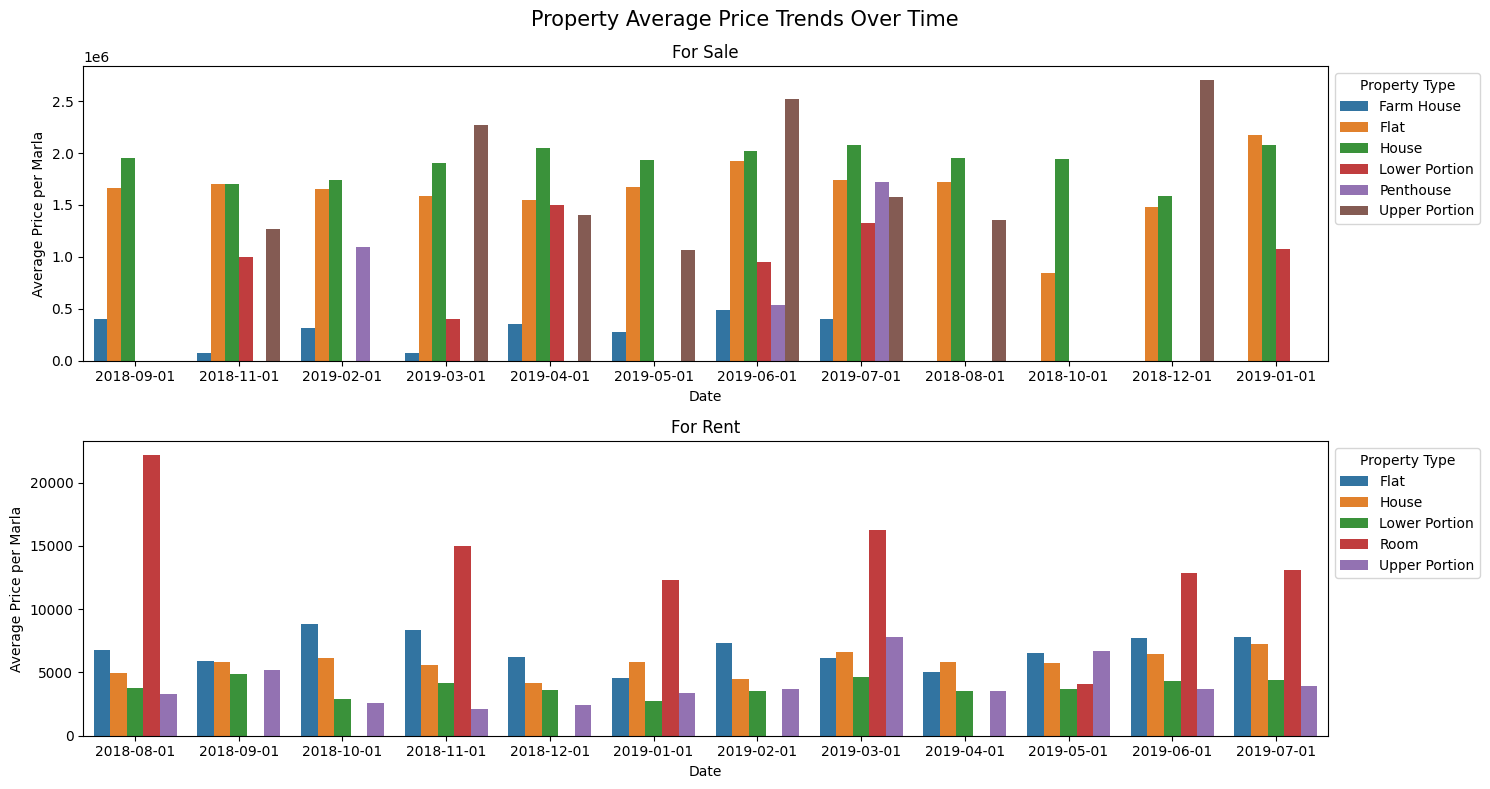

In [51]:
plt.figure(figsize=(15,8))
plt.suptitle("Property Average Price Trends Over Time", fontsize = 15)


plt.subplot(2, 1, 1)
df_sale_copy = df_sale.copy(deep=True)
property_avg_price(df_sale_copy, "For Sale")

plt.subplot(2, 1, 2)
df_rent_copy = df_rent.copy(deep=True)
property_avg_price(df_rent_copy, "For Rent")

plt.tight_layout()
plt.show()

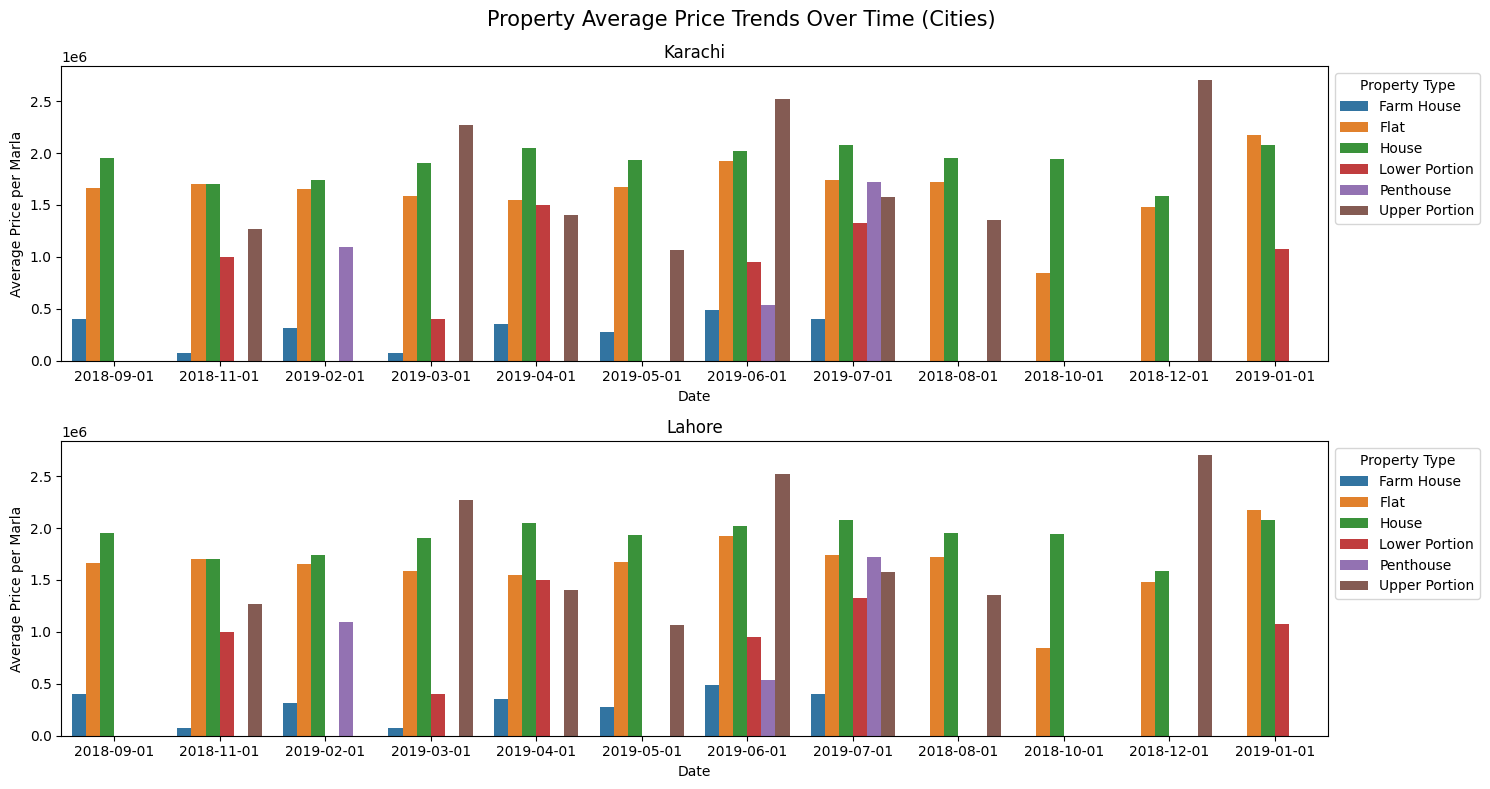

In [52]:
plt.figure(figsize=(15,8))
plt.suptitle("Property Average Price Trends Over Time (Cities) ", fontsize = 15)

#For Sale df
#Karachi
plt.subplot(2, 1, 1)
df_city1 = df_sale[df_sale['city'] == "Karachi"]
df_city1_copy = df_sale.copy(deep=True)
property_avg_price(df_city1_copy, "Karachi")

#Lahore
plt.subplot(2, 1, 2)
df_city2 = df_sale[df_sale['city'] == "Lahore"]
df_city2_copy = df_sale.copy(deep=True)
property_avg_price(df_city2_copy, "Lahore")

plt.tight_layout()
plt.show()


We can observe that Farmhouses are positioned at the lower end of the plot because we have considered the average price per marla. However, if we had used the total price, Farmhouses would have been prominently positioned at the top of the curve.